# RMS Energy & Zero Crossing

In [2]:
import IPython.display as ipd
import torch
import torchaudio
import librosa
from pathlib import Path

DATA_DIR = Path('data')

def download_asset_external(url: str, key: str) -> str:
    path = DATA_DIR / Path(key)
    if not path.exists():
        path.parent.mkdir(parents=True, exist_ok=True)
        torch.hub.download_url_to_file(url, path)
    return str(path)

In [5]:
GITHUB_PATH = "https://github.com/musikalkemist/AudioSignalProcessingForML/raw/master/8-%20Implementing%20the%20amplitude%20envelope/"

debussy_file = download_asset_external(GITHUB_PATH + "audio/debussy.wav", "audio/debussy.wav")
duke_file = download_asset_external(GITHUB_PATH + "audio/duke.wav", "audio/duke.wav")
redhot_file = download_asset_external(GITHUB_PATH + "audio/redhot.wav", "audio/redhot.wav")

debussy_waveform, sample_rate = torchaudio.load(debussy_file)
duke_waveform, sample_rate = torchaudio.load(duke_file)
redhot_waveform, sample_rate = torchaudio.load(redhot_file)

In [27]:
FRAME_SIZE = 1024
STEP_SIZE = 512

debussy_rms = librosa.feature.rms(y=debussy_waveform.numpy(), frame_length=FRAME_SIZE, hop_length=STEP_SIZE)[0]
duke_rms = librosa.feature.rms(y=duke_waveform.numpy(), frame_length=FRAME_SIZE, hop_length=STEP_SIZE)[0]
redhot_rms = librosa.feature.rms(y=redhot_waveform.numpy(), frame_length=FRAME_SIZE, hop_length=STEP_SIZE)[0]

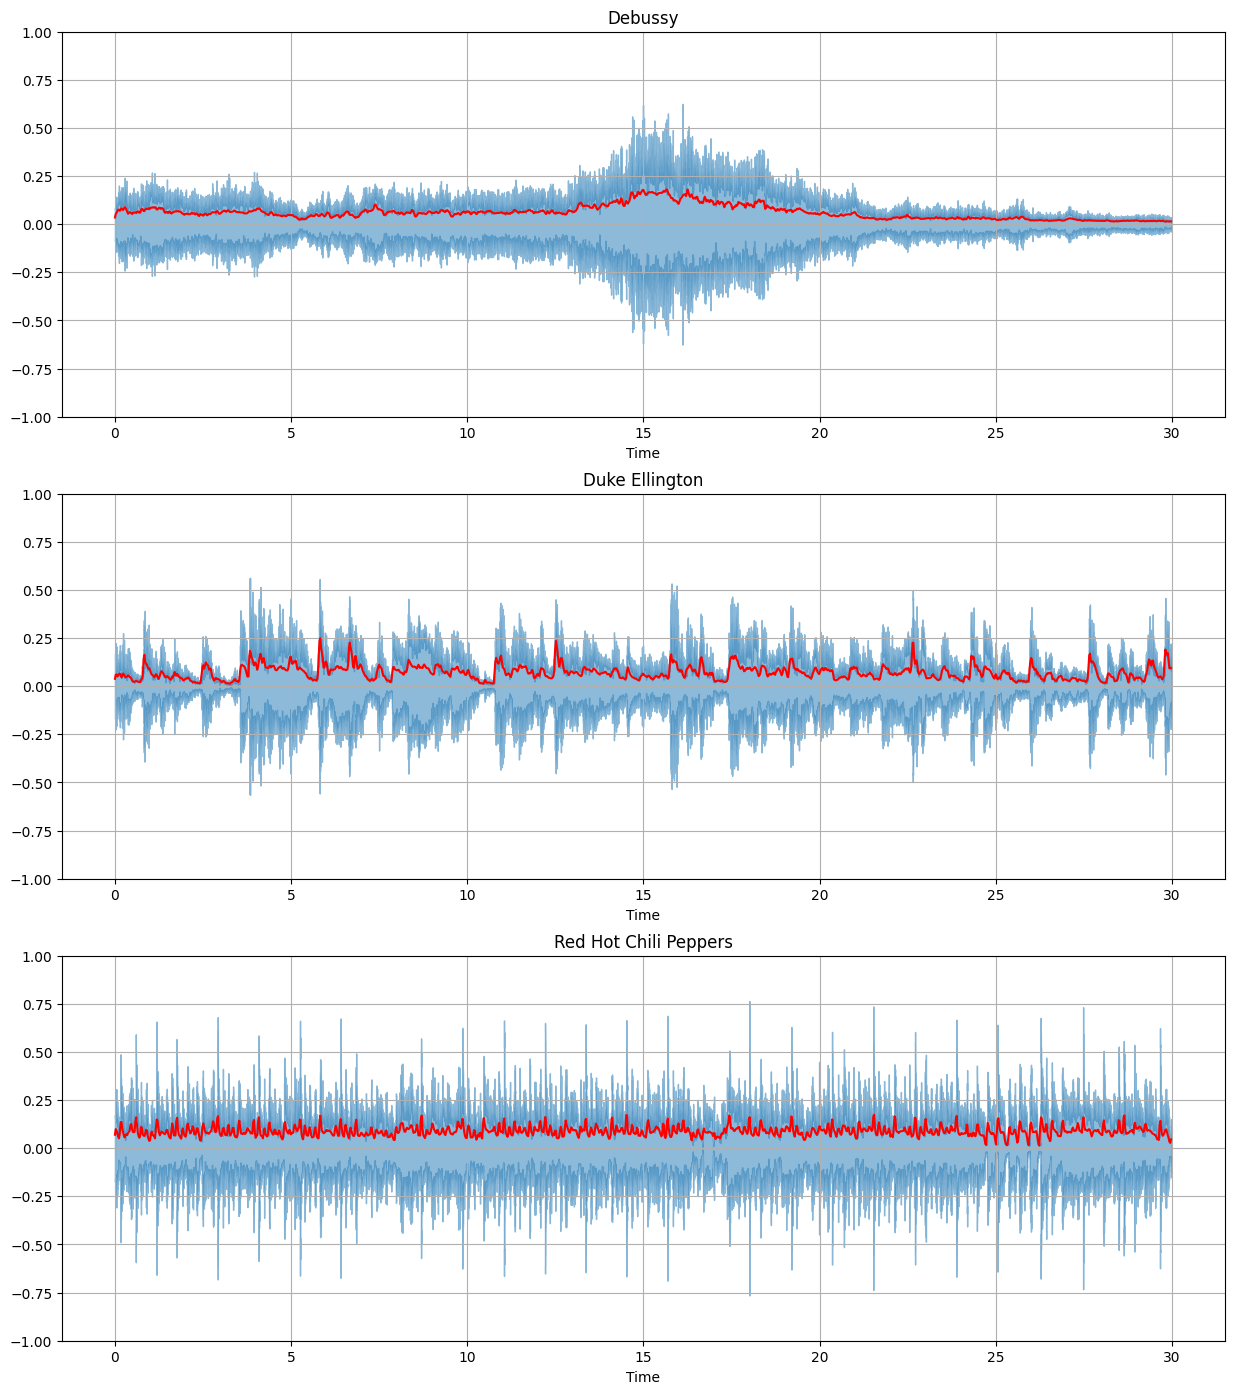

In [43]:
import matplotlib.pyplot as plt

frames = range(len(debussy_rms[0]))
t = librosa.frames_to_time(frames, hop_length=STEP_SIZE)

plt.figure(figsize=(15,17))

plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy_waveform.numpy(), alpha=0.5)
plt.plot(t, debussy_rms[0], color='r')
plt.ylim(-1, 1)
plt.title("Debussy")
plt.grid(True)

frames = range(len(duke_rms[0]))
t = librosa.frames_to_time(frames, hop_length=STEP_SIZE)

plt.subplot(3, 1, 2)
librosa.display.waveshow(duke_waveform.numpy(), alpha=0.5)
plt.plot(t, duke_rms[0], color='r')
plt.ylim(-1, 1)
plt.title("Duke Ellington")
plt.grid(True)


frames = range(len(redhot_rms[0]))
t = librosa.frames_to_time(frames, hop_length=STEP_SIZE)

plt.subplot(3, 1, 3)
librosa.display.waveshow(redhot_waveform.numpy(), alpha=0.5)
plt.plot(t, redhot_rms[0], color='r')
plt.ylim(-1, 1)
plt.title("Red Hot Chili Peppers")
plt.grid(True)



# RMS Energy From Scratch

In [63]:
import numpy as np

# sqrt( 1/ k *  SUM(k=t*k, (t+1)*K-1) of {  s(k)^2 }
# def rms_energy(signal: torch.Tensor, frame_length: int, hop_length: int) -> torch.Tensor:
#     squared_signal = signal ** 2
#     window = torch.ones(frame_length)
#     energy = torch.nn.functional.conv1d(squared_signal.unsqueeze(0), window.unsqueeze(0), stride=hop_length).squeeze(0)
#     return torch.sqrt(energy / frame_length)


def rms_energy_by_hand(signal: np.array, frame_length: int, hop_length: int) -> np.array:
    rms = []
    for i in range(0, len(signal), hop_length):
        frame = signal[i:i+frame_length]
        rms_value = np.sqrt( np.sum(frame**2) / frame_length )
        rms.append(rms_value)
    return np.array(rms)

debussy_rms2 = rms_energy_by_hand(debussy_waveform[0].numpy(), FRAME_SIZE, STEP_SIZE)
# Diff
diff = np.abs(debussy_rms2 - debussy_rms[0])
print(np.mean(diff))
print(max(diff))


0.003204808666689294
0.0226432362137311


# Zero Crossing

In [68]:
debussy_zc = librosa.feature.zero_crossing_rate(debussy_waveform.numpy(), frame_length=FRAME_SIZE, hop_length=STEP_SIZE)[0][0]
duke_zc = librosa.feature.zero_crossing_rate(duke_waveform.numpy(), frame_length=FRAME_SIZE, hop_length=STEP_SIZE)[0][0]
redhot_zc = librosa.feature.zero_crossing_rate(redhot_waveform.numpy(), frame_length=FRAME_SIZE, hop_length=STEP_SIZE)[0][0]



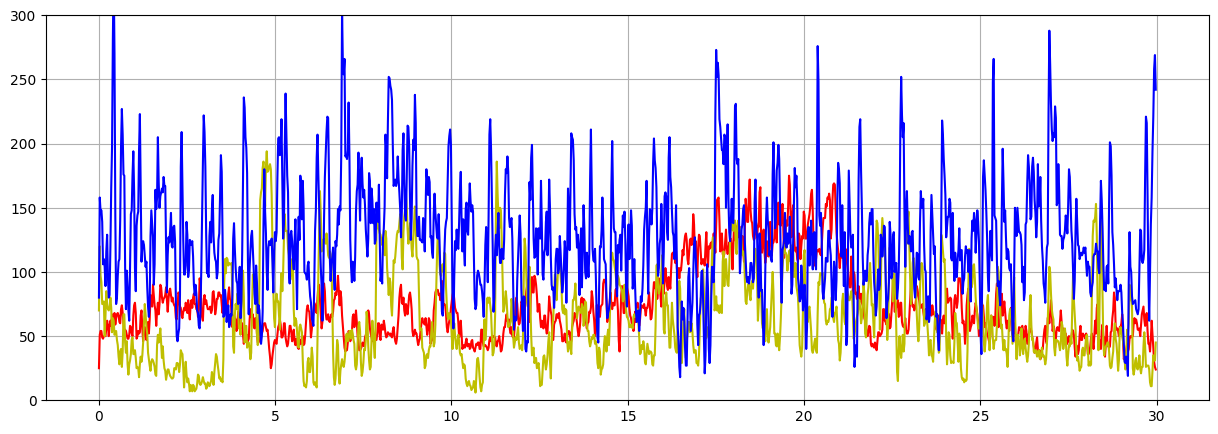

In [76]:

frames = range(len(debussy_zc))
t = librosa.frames_to_time(frames, hop_length=STEP_SIZE)

plt.figure(figsize=(15,5))
plt.plot(t, debussy_zc * FRAME_SIZE, color='r')
plt.plot(t, duke_zc * FRAME_SIZE, color='y')
plt.plot(t, redhot_zc * FRAME_SIZE, color='b')
plt.ylim(0, 300)
plt.grid(True)